# Bitcoin Price History 


## Tutorial

This tutorial, inspired by the obsolete by now post on https://notebooks.ai,  we're going to pull Bitcoin cryptocurrency prices from a public API and download them as Excel files. I need to import two libraries first: *requests*  (to pull data from the web) and *pandas* to process it. May require `pip install requests`

In [25]:
import requests
# !pip install -q pandas
import pandas as pd
import matplotlib.pyplot as plt

I have a predefined function that simplifies the process of importing data from Cryptocompare (for reference, check their website and documentation).

In [26]:
def get_historic_price(symbol, exchange='bitfinex', days=100):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': symbol,
        'tsym': 'USD',
        'limit': days,  # maximum records per request
        #'exchange': exchange
    }
 
    resp = requests.get(url, params=params)
    resp.raise_for_status()
 
    data_dict = resp.json()['Data']['Data']
    df = pd.DataFrame(data_dict)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    df = df[['open', 'high', 'low', 'close', 'volumeto']]
    df.columns = ['OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume']
 
    return df

We will now pull data from Bitcoin, the most popular cryptocurrencies, for the last 100 days, and plot it:

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
time,,,,,
2023-07-25,29181.04,29367.59,29054.49,29226.63,3.545419e+08
2023-07-26,29226.63,29682.98,29098.81,29352.06,4.865108e+08
2023-07-27,29352.06,29566.99,29082.04,29217.05,3.732689e+08
2023-07-28,29217.05,29528.45,29121.24,29316.82,3.429751e+08
2023-07-29,29316.82,29406.57,29258.14,29358.76,1.463160e+08


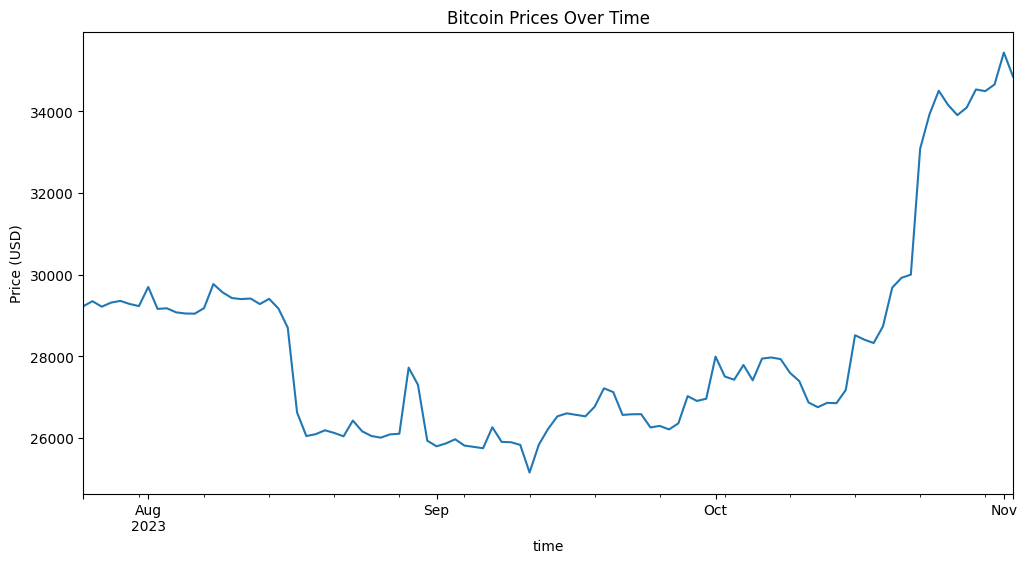

In [27]:
# Example call
df = get_historic_price('BTC', days = 100)
display(df.head())
 
# Plotting OHLC Prices
df['ClosePrice'].plot(figsize=(12, 6))
plt.title("Bitcoin Prices Over Time")
plt.ylabel("Price (USD)")
plt.show()

## Dynamic plots with Bokeh

May need to `pip install bokeh`

In [28]:
!pip install -q bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

p1 = figure(x_axis_type="datetime", title="Crypto Prices")
p1.height=400
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price $'
p1.line(df.index, df['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
p1.legend.location = "top_left"

show(p1)

Loading BokehJS ...

## Exporting to Excel

In [29]:
!pip install -q openpyxl
import openpyxl
writer = pd.ExcelWriter('Bitcoin_history.xlsx')
df.to_excel(writer, sheet_name='Bitcoin')
writer.close()

## Exporting to CSV

In [ ]:
df.to_csv('Bitcoin_history.csv')